In [1]:
import tensorflow as tf


In [2]:
hello_constant = tf.constant('Hello World!')


In [3]:
with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


In [5]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234) 
# B is a 1-dimensional int32 tensor
B = tf.constant([123,456,789]) 
# C is a 2-dimensional int32 tensor
C = tf.constant([ [123,456,789], [222,333,444] ])

In [6]:
with tf.Session() as sess:
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


In [9]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

In [10]:
with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World', y: 123, z: 45.67})

In [17]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf


def run():
    output = None
    x = tf.placeholder(tf.int32)
    y = tf.add(1,3)

    with tf.Session() as sess:
        # TODO: Feed the x tensor 123
        output = sess.run(x,feed_dict={x:11})
        output = sess.run(y)

    return output


In [18]:
run()

4

In [31]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

# TODO: Convert the following to TensorFlow:
x = tf.constant(10)
y = tf.constant(2)
z = tf.subtract(tf.divide(x,y),tf.cast(tf.constant(1), tf.float64))

# TODO: Print z from a session
with tf.Session() as sess:
    output = sess.run(z)
    print(output)


4.0


[  2.11513104e-19   5.74952226e-19   1.56288219e-18   4.24835426e-18
   1.15482242e-17   3.13913279e-17   8.53304763e-17   1.00000000e+00]


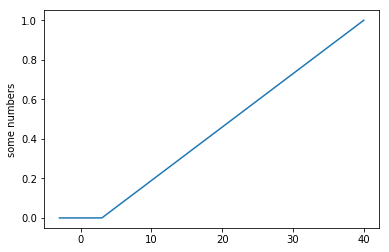

In [43]:
import matplotlib.pyplot as plt
import numpy as np
def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

X = [-3,-2, -1,0,1,2,3,40] 
Y = softmax(X)
print (softmax(X))    
plt.plot(X,Y)
plt.ylabel('some numbers')
plt.show()

In [44]:
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

In [46]:
print(weights)

<bound method Variable.value of <tf.Variable 'Variable:0' shape=(120, 5) dtype=float32_ref>>


In [48]:

# Solution is available in the other "quiz_solution.py" tab
import tensorflow as tf

def get_weights(n_features, n_labels):
    """
    Return TensorFlow weights
    :param n_features: Number of features
    :param n_labels: Number of labels
    :return: TensorFlow weights
    """
    # TODO: Return weights
    return  tf.Variable(tf.truncated_normal((n_features, n_labels)))


def get_biases(n_labels):
    """
    Return TensorFlow bias
    :param n_labels: Number of labels
    :return: TensorFlow bias
    """
    # TODO: Return biases
    tf.Variable(tf.zeros(n_labels))


def linear(input, w, b):
    """
    Return linear function in TensorFlow
    :param input: TensorFlow input
    :param w: TensorFlow weights
    :param b: TensorFlow biases
    :return: TensorFlow linear function
    """
    # TODO: Linear Function (xW + b)
    tf.add(tf.matmul(input,w) ,b)

In [50]:

    
# Solution is available in the other "sandbox_solution.py" tab
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


def mnist_features_labels(n_labels):
    """
    Gets the first <n> labels from the MNIST dataset
    :param n_labels: Number of labels to use
    :return: Tuple of feature list and label list
    """
    mnist_features = []
    mnist_labels = []

    mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

    # In order to make quizzes run faster, we're only looking at 10000 images
    for mnist_feature, mnist_label in zip(*mnist.train.next_batch(10000)):

        # Add features and labels if it's for the first <n>th labels
        if mnist_label[:n_labels].any():
            mnist_features.append(mnist_feature)
            mnist_labels.append(mnist_label[:n_labels])

    return mnist_features, mnist_labels


# Number of features (28*28 image is 784 features)
n_features = 784
# Number of labels
n_labels = 3

# Features and Labels
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Weights and Biases
w = get_weights(n_features, n_labels)
b = get_biases(n_labels)

# Linear Function xW + b
logits = linear(features, w, b)

# Training data
train_features, train_labels = mnist_features_labels(n_labels)

with tf.Session() as session:
    # TODO: Initialize session variables
    
    # Softmax
    prediction = tf.nn.softmax(logits)

    # Cross entropy
    # This quantifies how far off the predictions were.
    # You'll learn more about this in future lessons.
    cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    # You'll learn more about this in future lessons.
    loss = tf.reduce_mean(cross_entropy)

    # Rate at which the weights are changed
    # You'll learn more about this in future lessons.
    learning_rate = 0.08

    # Gradient Descent
    # This is the method used to train the model
    # You'll learn more about this in future lessons.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Run optimizer and get loss
    _, l = session.run(
        [optimizer, loss],
        feed_dict={features: train_features, labels: train_labels})

# Print loss
print('Loss: {}'.format(l))


ValueError: Tried to convert 'y' to a tensor and failed. Error: None values not supported.